# Stock Price Prediction

## About the Dataset

The dataset sourced from Kaggle comprises historical stock price and trading data for various publicly traded companies. It includes daily Open, High, Low, and Close prices, trading volumes, and potentially additional features. The dataset covers a defined time period and offers a valuable resource for developing accurate stock price prediction models using machine learning techniques.

## Problem Statement:

Develop a data science project to predict the next-day directional movement (up or down) of stock prices for a selected set of companies. Utilize historical stock price data, technical indicators, and potentially external factors. Build and compare machine learning models to provide actionable insights for short-term stock trading strategies.

## Importing Libraries

In [238]:
import numpy as np
import math
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

In [239]:
import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset

The dataset is loaded for preprocessing, Visualisation and evaluation

In [240]:
df = pd.read_csv(r"C:\Users\sidha\OneDrive\Documents\VI Semester\DS intern\NFLX.csv")

## Data Preprocessing

In [241]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [242]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [243]:
df.shape

(1009, 7)

In [244]:
df.size

7063

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


# Data Cleaning

The dataset is checked for possible duplicate and null values and are dropped/removed.

In [246]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1004    False
1005    False
1006    False
1007    False
1008    False
Length: 1009, dtype: bool

In [247]:
df.duplicated().sum()

0

In [248]:
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1004,False,False,False,False,False,False,False
1005,False,False,False,False,False,False,False
1006,False,False,False,False,False,False,False
1007,False,False,False,False,False,False,False


In [249]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# EDA: Exploratory Data Analysis

# Description

This section describes the analysis of the dataset and the grouping of the dataset elements.

In [177]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


### Correlation

In [178]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


In [179]:
df.groupby('Volume').max()

,Date,Open,High,Low,Close,Adj Close
Volume,,,,,,
1144000,2020-12-24,515.119995,519.349976,512.210022,513.969971,513.969971
1287200,2021-12-29,610.710022,613.979980,604.679993,610.539978,610.539978
1367800,2021-08-09,521.150024,522.669983,517.989990,519.969971,519.969971
1595500,2021-08-26,546.159973,552.599976,545.900024,550.119995,550.119995
1621100,2021-12-23,616.400024,616.880005,607.570007,614.090027,614.090027
...,...,...,...,...,...,...
32637500,2021-01-20,565.419983,593.289978,556.859985,586.340027,586.340027
33866500,2018-04-17,329.660004,338.619995,323.769989,336.059998,336.059998
38258900,2019-10-17,304.489990,308.750000,288.299988,293.350006,293.350006


In [180]:
df.groupby('Volume').mean()

,Open,High,Low,Close,Adj Close
Volume,,,,,
1144000,515.119995,519.349976,512.210022,513.969971,513.969971
1287200,610.710022,613.979980,604.679993,610.539978,610.539978
1367800,521.150024,522.669983,517.989990,519.969971,519.969971
1595500,546.159973,552.599976,545.900024,550.119995,550.119995
1621100,616.400024,616.880005,607.570007,614.090027,614.090027
...,...,...,...,...,...
32637500,565.419983,593.289978,556.859985,586.340027,586.340027
33866500,329.660004,338.619995,323.769989,336.059998,336.059998
38258900,304.489990,308.750000,288.299988,293.350006,293.350006


In [181]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [182]:
columns_to_show = ["Date", "High", "Low","Close"]
df.groupby(["Close"])[columns_to_show].describe(percentiles=[])

High                                                       Low  \
           count        mean std         min         50%         max count   
Close                                                                        
233.880005   1.0  250.649994 NaN  250.649994  250.649994  250.649994   1.0   
246.389999   1.0  264.500000 NaN  264.500000  264.500000  264.500000   1.0   
249.470001   1.0  255.800003 NaN  255.800003  255.800003  255.800003   1.0   
250.100006   1.0  267.619995 NaN  267.619995  267.619995  267.619995   1.0   
253.669998   1.0  254.500000 NaN  254.500000  254.500000  254.500000   1.0   
...          ...         ...  ..         ...         ...         ...   ...   
682.609985   1.0  683.340027 NaN  683.340027  683.340027  683.340027   1.0   
687.400024   1.0  688.359985 NaN  688.359985  688.359985  688.359985   1.0   
688.289978   1.0  689.390015 NaN  689.390015  689.390015  689.390015   1.0   
690.309998   1.0  690.969971 NaN  690.969971  690.969971  690.969971   1.0   
691.690002   1.0  700.989990 NaN  700.989990  700.989990  700.989990   1.0   

                                                               Close  \
                  mean std         min         50%         max count   
Close                                                                  
233.880005  233.679993 NaN  233.679993  233.679993  233.679993   1.0   
246.389999  241.289993 NaN  241.289993  241.289993  241.289993   1.0   
249.470001  236.110001 NaN  236.110001  236.110001  236.110001   1.0   
250.100006  250.000000 NaN  250.000000  250.000000  250.000000   1.0   
253.669998  231.229996 NaN  231.229996  231.229996  231.229996   1.0   
...                ...  ..         ...         ...         ...   ...   
682.609985  653.820007 NaN  653.820007  653.820007  653.820007   1.0   
687.400024  676.900024 NaN  676.900024  676.900024  676.900024   1.0   
688.289978  677.270020 NaN  677.270020  677.270020  677.270020   1.0   
690.309998  671.239990 NaN  671.239990  671.239990  671.239990   1.0   
691.690002  686.090027 NaN  686.090027  686.090027  686.090027   1.0   

                                                                
                  mean std         min         50%         max  
Close                                                           
233.880005  233.880005 NaN  233.880005  233.880005  233.880005  
246.389999  246.389999 NaN  246.389999  246.389999  246.389999  
249.470001  249.470001 NaN  249.470001  249.470001  249.470001  
250.100006  250.100006 NaN  250.100006  250.100006  250.100006  
253.669998  253.669998 NaN  253.669998  253.669998  253.669998  
...                ...  ..         ...         ...         ...  
682.609985  682.609985 NaN  682.609985  682.609985  682.609985  
687.400024  687.400024 NaN  687.400024  687.400024  687.400024  
688.289978  688.289978 NaN  688.289978  688.289978  688.289978  
690.309998  690.309998 NaN  690.309998  690.309998  690.309998  
691.690002  691.690002 NaN  691.690002  691.690002  691.690002  

[988 rows x 18 columns]

In [183]:
df.apply(np.max)

Date         2022-02-04
Open         692.349976
High          700.98999
Low          686.090027
Close        691.690002
Adj Close    691.690002
Volume         58904300
dtype: object

In [184]:
df.apply(np.min)

Date         2018-02-05
Open         233.919998
High         250.649994
Low          231.229996
Close        233.880005
Adj Close    233.880005
Volume          1144000
dtype: object

# Data Analysis

It deals with the possible plotting and charts to analyse data in a pictographic format

### Line PLot

Text(0.5, 1.0, 'XYZ')

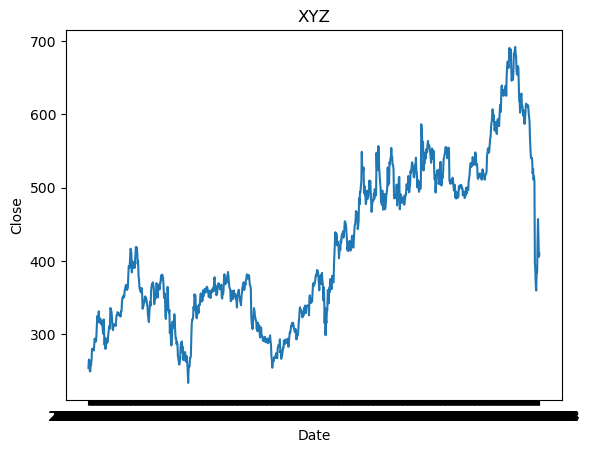

In [185]:
plt.plot(df["Date"],df["Close"])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("XYZ")

####  Inference from Close vs. Date Plot:

The line plot of Close prices against Date in the stock price prediction project reveals the historical trend of the stock's value over time. Analyzing this plot can offer insights into the stock's overall direction (upward, downward, or stable), volatility, and potential patterns such as trends, cycles, and seasonality. This visual exploration helps in identifying potential relationships between past price movements and external factors, aiding in building predictive models for future price movements.

### Scatter Plot

Text(0, 0.5, 'Volume')

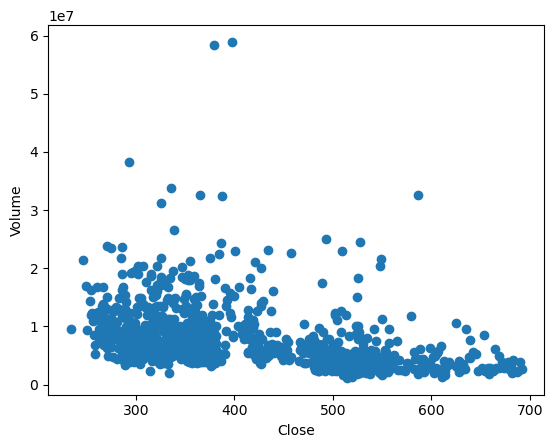

In [186]:
plt.scatter(df["Close"],df["Volume"])
plt.xlabel("Close")
plt.ylabel("Volume")

##### Inference for Scatter Plot (Volume vs. Close) in Stock Price Prediction:

The scatter plot of Volume (trading volume) against Close prices reveals important insights. A positive correlation between Volume and Close suggests that higher trading volumes often coincide with significant price movements. Unusual spikes in volume might indicate market events driving price shifts. However, caution is needed, as high volume could also reflect temporary fluctuations. Combining volume data with other features can enhance predictive models' ability to capture price trends and potential buy/sell signals.

### Bar graph

<BarContainer object of 1009 artists>

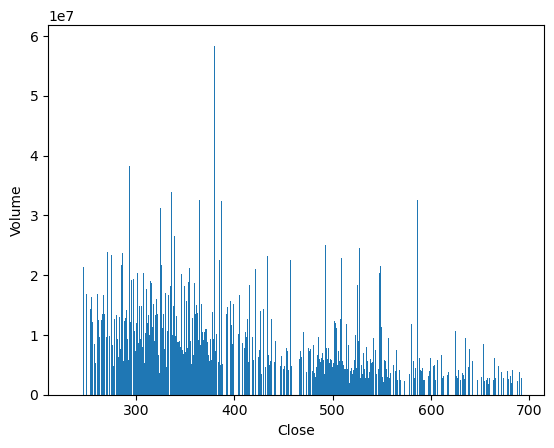

In [187]:
plt.xlabel("Close")
plt.ylabel("Volume")
plt.bar(df["Close"],df["Volume"])

##### Inference for Bar Graph of Volume vs Close in Stock Price Prediction:

The bar graph depicting the relationship between trading volume and closing stock prices provides valuable insights. Higher trading volumes usually accompany significant price movements, suggesting increased market interest during those periods. This insight can be crucial for identifying potential trend changes, volatility, and investor sentiment shifts. Analyzing the interplay between volume and closing prices can aid in detecting potential price breakouts, reversals, and periods of consolidation, assisting traders and investors in making informed decisions.

### Dist Plot

<Axes: xlabel='Volume', ylabel='Density'>

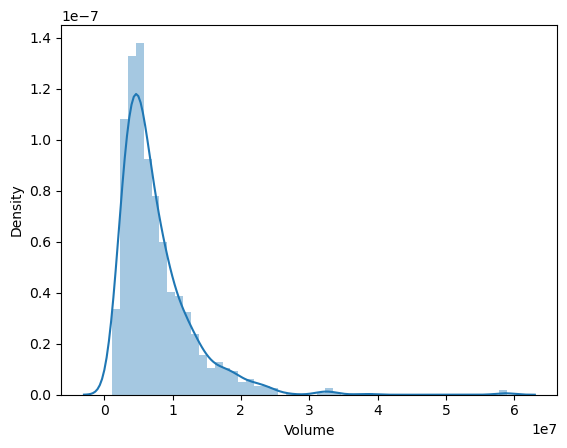

In [188]:
sns.distplot(df['Volume'])

In [189]:
cm = sns.light_palette("green", as_cmap=True)
df.head(5).style.background_gradient(cmap=cm)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


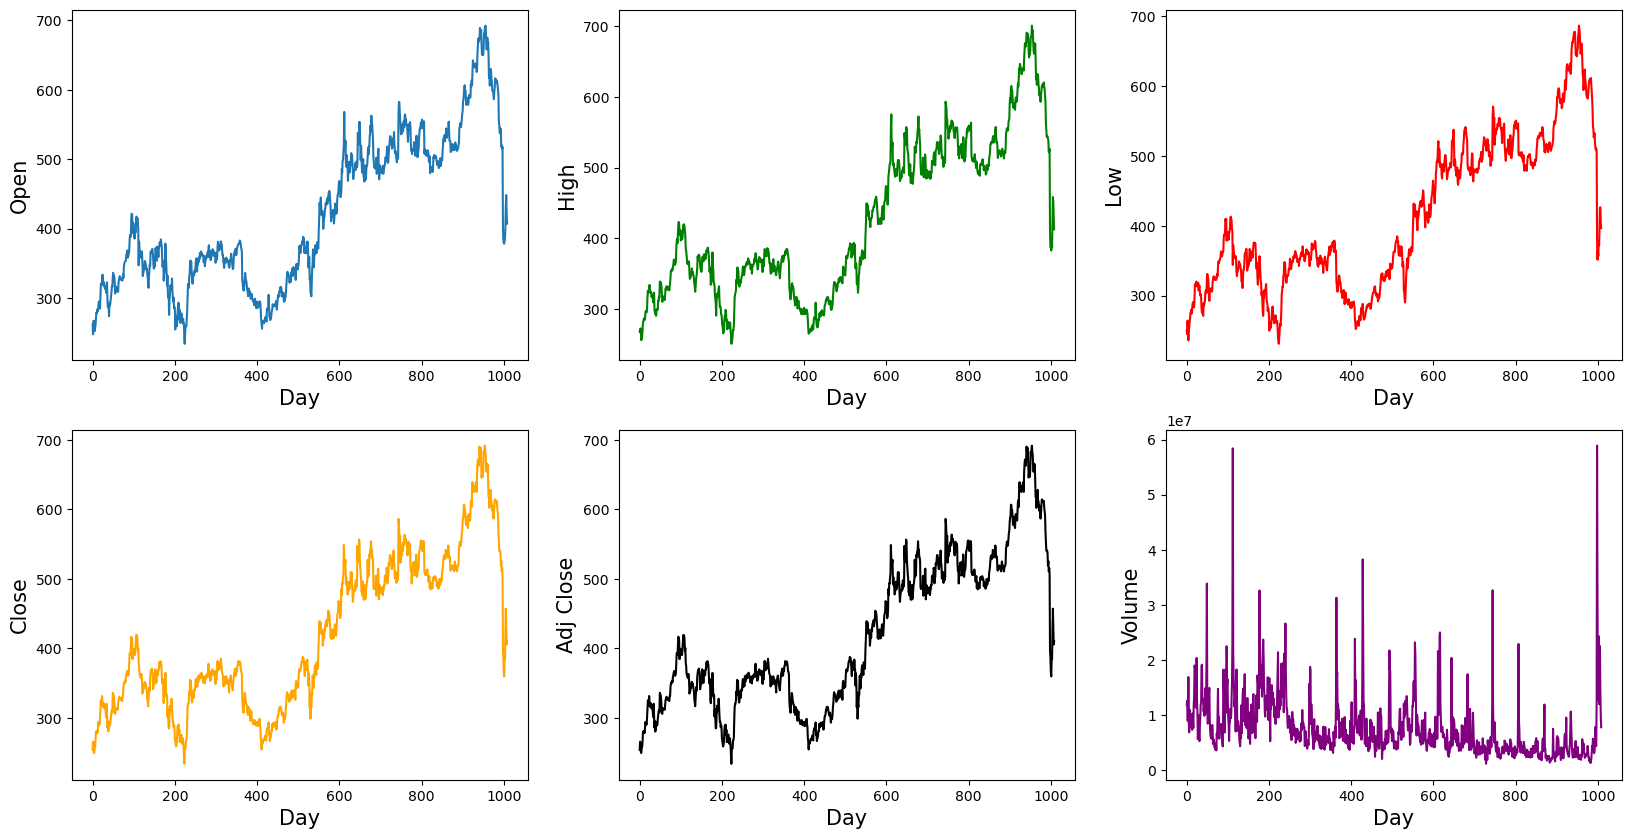

In [190]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 10))

ax1.plot(df['Open'])
ax1.set_xlabel("Day", fontsize=15)
ax1.set_ylabel("Open", fontsize=15)

ax2.plot(df['High'], color='green')
ax2.set_xlabel("Day", fontsize=15)
ax2.set_ylabel("High", fontsize=15)

ax3.plot(df['Low'], color='red')
ax3.set_xlabel("Day", fontsize=15)
ax3.set_ylabel("Low", fontsize=15)

ax4.plot(df['Close'], color='orange')
ax4.set_xlabel("Day", fontsize=15)
ax4.set_ylabel("Close", fontsize=15)

ax5.plot(df['Adj Close'], color='black')
ax5.set_xlabel("Day", fontsize=15)
ax5.set_ylabel("Adj Close", fontsize=15)

ax6.plot(df['Volume'], color='purple')
ax6.set_xlabel("Day", fontsize=15)
ax6.set_ylabel("Volume", fontsize=15)

plt.show()

### Histogram

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

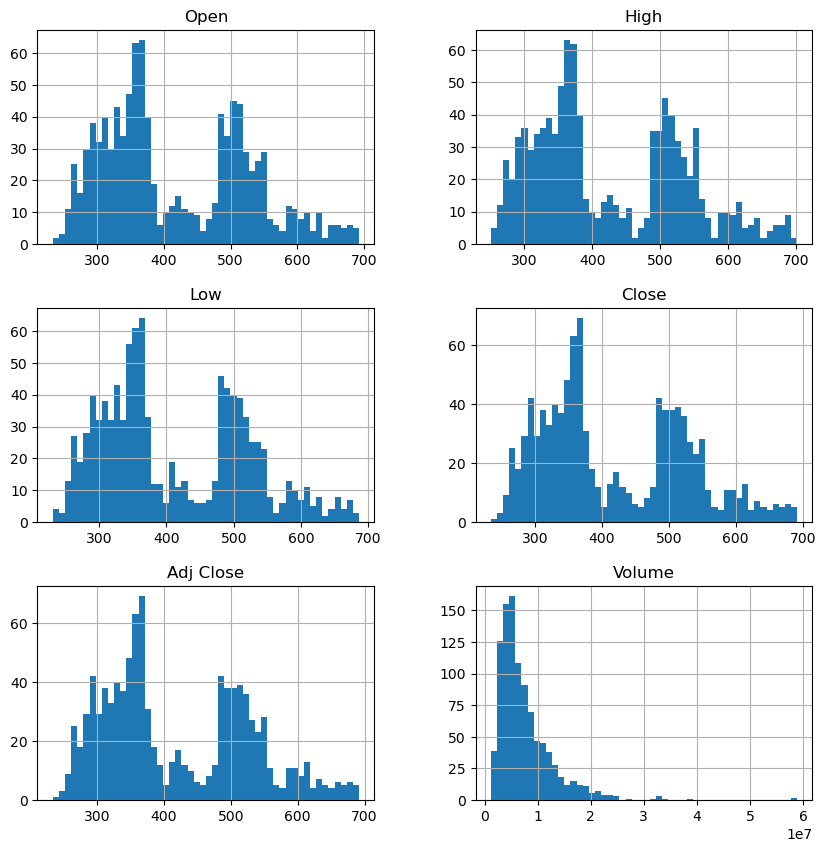

In [191]:
df.hist(figsize=(10,10),bins=50)

#### Pair Plot

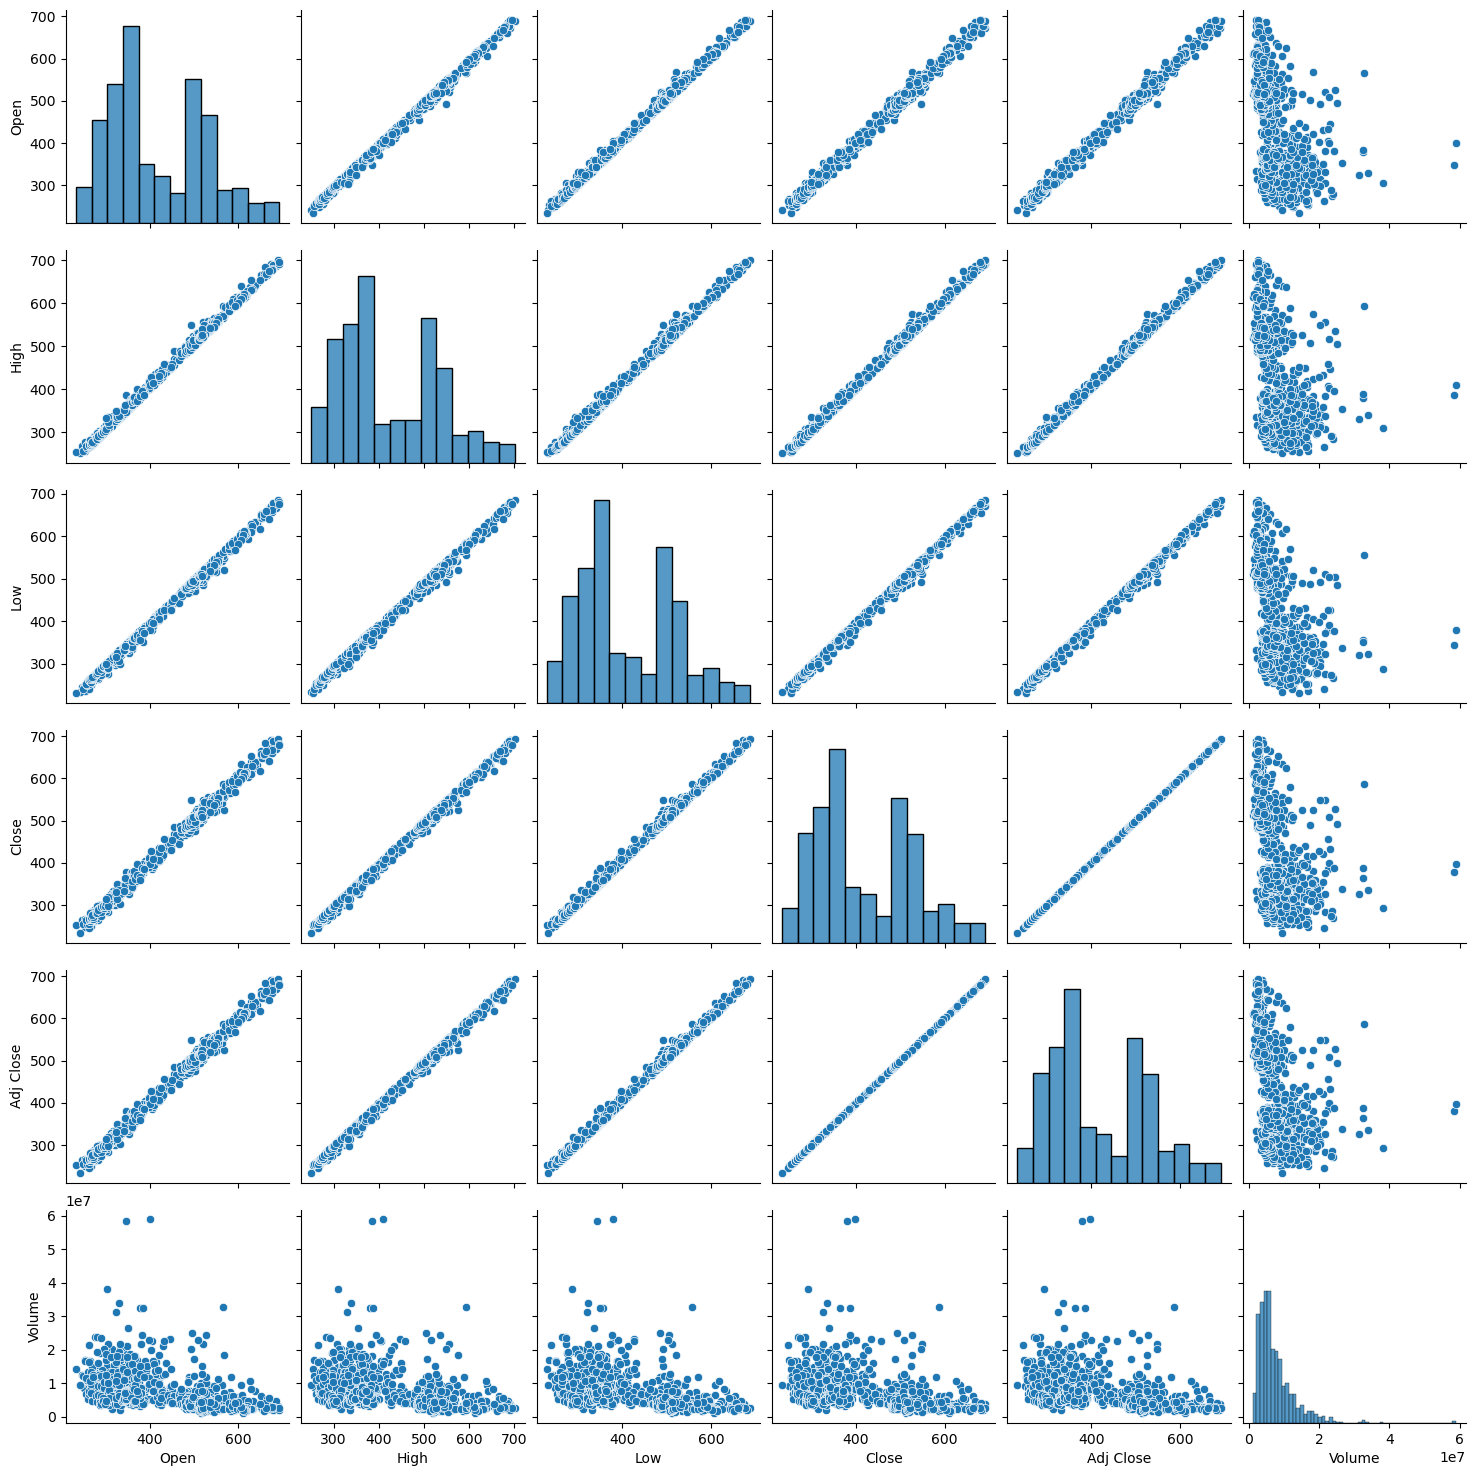

In [192]:
sns.pairplot(df)

### Inference for Pair Plot in Stock Price Prediction:

The pair plot visualizing relationships among stock price prediction terms (Open, Close, High, Low, Adj Close, and Volume) offers insights into their correlations and patterns. Notable observations include:

1. **Correlation:** Strong positive correlations between Open, High, Low, Close, and Adj Close are evident, indicating synchronization in price movements. Volume shows moderate correlations with price-related terms.

2. **Patterns:** Clear visual patterns like diagonal alignment and similar trend slopes reflect consistent price movements. Adj Close closely aligns with Close, confirming their equivalence in non-adjusted scenarios.

3. **Outliers:** Isolated data points in Volume could signify significant trading events impacting volume without substantial price change.

4. **Volume-Price Interaction:** Instances of higher volume correspond with price spikes, suggesting increased market activity during those periods.

5. **Volatility Identification:** Patterns of widening gaps between High and Low prices signify periods of increased volatility.

6. **Trading Range:** The spread between Open and Close prices indicates intra-day price shifts, helping traders assess day-long trends.

Overall, the pair plot aids in understanding relationships, identifying anomalies, and extracting meaningful insights from the interplay of stock price prediction terms, guiding better trading and investment strategies.

# Modelling

# **Data Modeling in Stock Price Prediction:**

In the context of stock price prediction, data modeling involves selecting and training appropriate machine learning algorithms to learn patterns from historical data for making predictions. Here's a high-level overview of the process:

1. **Feature Selection/Engineering:**
   - Choose relevant features like Open, Close, High, Low, Volume, and potentially technical indicators.
   - Create lagged features and compute additional indicators to capture market trends.
2. **Data Splitting:**
   - Divide the dataset into training, validation, and test sets.
   - Ensure chronological order is maintained to simulate real-world conditions.
3. **Selecting Models:**
   - Choose algorithms suited for time series forecasting, such as Linear Regression, Decision Trees, Random Forests & KNN etc.
4. **Model Training:**
   - Train the selected models on the training data using features as inputs and target (e.g., Close price) as output.
   - Tune hyperparameters using the validation set to optimize model performance.
5. **Model Evaluation:**
   - Evaluate models using appropriate metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or direction accuracy.
   - Compare results across models to identify the most suitable one.
6. **Predictions:**
   - Use the trained model to make predictions on the test set or future data.

# Splitting the dataset

In [193]:
print(df.columns)
print(df.shape)
std = StandardScaler()
df.drop([
    'Date'
],axis = 1, inplace = True)
df = std.fit_transform(df)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
(1009, 7)


In [194]:
new_data = pd.DataFrame(df)
new_data.head()

,0,1,2,3,4,5
0,-1.447772,-1.441465,-1.510141,-1.522047,-1.522047,0.791791
1,-1.579589,-1.452453,-1.556931,-1.416167,-1.416167,0.919875
2,-1.405553,-1.399802,-1.377121,-1.426885,-1.426885,0.258257
3,-1.400944,-1.444029,-1.510420,-1.560481,-1.560481,0.317787
4,-1.522898,-1.552262,-1.639627,-1.566302,-1.566302,1.709045


In [195]:
Y = new_data[5]
X = new_data.drop([5], axis=1)

In [196]:
X.head()

,0,1,2,3,4
0,-1.447772,-1.441465,-1.510141,-1.522047,-1.522047
1,-1.579589,-1.452453,-1.556931,-1.416167,-1.416167
2,-1.405553,-1.399802,-1.377121,-1.426885,-1.426885
3,-1.400944,-1.444029,-1.510420,-1.560481,-1.560481
4,-1.522898,-1.552262,-1.639627,-1.566302,-1.566302


In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
ms = []
ma = []
mse = mean_squared_error
mae = mean_absolute_error

In [198]:
X_train

,0,1,2,3,4
765,1.188568,1.132411,1.176120,1.119950,1.119950
728,0.885481,0.861005,0.928685,0.877425,0.877425
658,0.746013,0.726492,0.659854,0.599237,0.599237
150,-0.615665,-0.666803,-0.644581,-0.652191,-0.652191
530,-1.036374,-0.832998,-1.094151,-1.110170,-1.110170
...,...,...,...,...,...
835,0.783070,0.733359,0.794083,0.739856,0.739856
192,-0.978577,-0.886016,-0.942992,-0.845379,-0.845379
629,0.826118,0.776305,0.826268,0.767850,0.767850
559,0.054758,0.033690,0.078751,0.021982,0.021982


In [199]:
X_test

,0,1,2,3,4
801,1.271530,1.230938,1.283002,1.244769,1.244769
311,-0.378487,-0.382943,-0.352215,-0.369014,-0.369014
85,-0.465689,-0.518463,-0.507654,-0.532176,-0.532176
435,-1.299823,-1.278017,-1.256008,-1.267049,-1.267049
204,-1.461138,-1.456574,-1.475072,-1.455803,-1.455803
...,...,...,...,...,...
784,0.897281,0.847728,0.850919,0.792611,0.792611
231,-1.078131,-0.993699,-1.029967,-0.957726,-0.957726
5,-1.538661,-1.521587,-1.519722,-1.487954,-1.487954
452,-1.088178,-1.071990,-1.036013,-1.051779,-1.051779


In [200]:
y_train

765   -0.865703
728   -1.176440
658   -0.581345
150   -0.332884
530    0.547192
         ...   
835   -0.931402
192    1.053963
629   -0.597216
559   -0.236725
684   -0.104851
Name: 5, Length: 807, dtype: float64

In [210]:
y_test

801    -0.887889
311    -0.397685
85      0.129478
435    -0.242051
204     0.902082
          ...   
784    -0.636335
231     2.022655
5       0.176505
452    -0.450112
1008    0.038756
Name: 5, Length: 202, dtype: float64

In [220]:
y_pred = model.predict(X_test)

In [221]:
def model_training_and_score(model):
    model.fit(X_train, y_train)
    print(mse(y_test, y_pred))
    print(mae(y_test, y_pred))
    ms.append(mse(y_test, y_pred))
    ma.append(mae(y_test, y_pred))

In [222]:
y_pred

array([-8.78967203e-01,  1.70584774e-01,  1.92848262e-03,  5.31437312e-02,
        3.85173334e-01,  2.05269145e-02,  8.64727309e-01, -2.53038445e-01,
       -8.64946130e-02,  6.26369859e-02, -9.10778576e-01,  1.52952875e-01,
       -6.06983443e-01, -2.44299378e-01, -8.73197296e-01, -4.22518485e-01,
       -5.43895220e-01, -9.10584538e-01,  1.39987522e+00,  3.71418549e-01,
        1.10246506e+00, -4.75619205e-01, -3.90267779e-01, -2.28096284e-02,
       -5.88642262e-02, -6.39644193e-01, -8.11423410e-01, -8.69376071e-02,
        7.84735746e-01, -1.62059895e-01,  1.77149142e-01, -6.21983005e-01,
       -2.26729718e-01, -4.15873573e-01,  6.70212607e-01, -8.54251059e-01,
        3.77210423e-01,  1.32551810e+00, -4.86554936e-01, -6.78982806e-01,
       -7.87479760e-01, -8.89072836e-02, -1.93453902e-01,  7.19381296e-01,
       -9.71446807e-01,  1.92620352e+00, -1.05664178e-01,  6.59090159e-01,
        9.39132019e-01,  3.21843477e-01, -4.91438855e-01, -7.86623060e-01,
       -6.61365551e-01, -

# 1. Linear Regression

Apply linear regression to predict stock prices using historical data as features. This model finds the best-fit line that minimizes the difference between predicted and actual prices. Ensure feature scaling, train the model, evaluate its performance, and make predictions for informed decision-making in trading or investment.

In [212]:
model = LinearRegression()
model_training_and_score(model)

0.4848013674563842
0.4768298011060687


* 0.48 is the actual pri 
* 0.47 is the

# 2. K Neighbors Regressor

Apply KNN regression to forecast stock prices. The algorithm estimates a target value by averaging the K nearest neighbor's target values from the training data. Experiment with different K values and distance metrics for optimal predictions. Perform data preprocessing and evaluation to enhance model accuracy.

In [213]:
model = KNeighborsRegressor()
model_training_and_score(model)

0.6668887419313744
0.4939760966987226


# 3. Decision Tree Regressor

Implement decision tree regression for predicting stock prices. The model partitions data into segments based on feature values and predicts target values within each segment. Adjust tree depth and other parameters to balance between underfitting and overfitting. Evaluate and refine the model for accurate predictions.

In [214]:
model = DecisionTreeRegressor()
model_training_and_score(model)

1.1805146528808654
0.6483224373446694


# 4. Random Forest Regressor

Utilize a Random Forest Regressor for stock price forecasting. This ensemble model constructs multiple decision trees and averages their predictions to improve accuracy and reduce overfitting. Tune hyperparameters like tree depth and number of trees for optimal performance. Prepare data, train the model, and evaluate its effectiveness for predicting stock prices.

In [215]:
model = RandomForestRegressor(n_estimators = 5)
model_training_and_score(model)

0.8012252154473594
0.5601491852198793


## Evaluation metrices RMSE, MSE and MAE

##### Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [216]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [233]:
mse = mean_squared_error(y_test,y_pred)
mse

0.8012252154473594

In [234]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.5601491852198793

In [227]:
rmse = np.sqrt(mse)
rmse

0.8951118452167636

## Explained variance regression score

###### The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [232]:
evs = explained_variance_score(y_test,y_pred)
evs

0.04346834937054356

## R2 score for regression

#####  R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

In [230]:
r2s = r2_score(y_test, y_pred)
r2s

0.03889996597107659